In [1]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [19]:
path = "/home/sonic/Desktop/lateral/Test/Label/*"

array([0., 1.], dtype=float32)

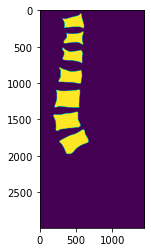

In [20]:
img = plt.imread(glob(path)[0])
plt.imshow(img)
np.unique(img)

In [ ]:
# print(np.stack((img,)*3,axis=-1).shape)
img = cv2.imread(glob(path)[0])
img_ori = cv2.imread(glob(path)[0].replace("/Label/","/Dataset/").replace("_label",""))

img_gray = cv2.imread(glob(path)[0],0)
print(img.shape)
#     ret,thresh = cv2.threshold(mask, 40, 255, 0)
if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
#     print(x,y,w,h)
    cv2.rectangle(img_ori,(x,y),(x+w,y+h),(0,0,255),3)
    
    
plt.figure(figsize=(20,20))
plt.imshow(img_ori)

In [ ]:
# print(np.stack((img,)*3,axis=-1).shape)
img = cv2.imread(glob(path)[0])
img_ori = cv2.imread(glob(path)[0].replace("/Label/","/Dataset/").replace("_label",""))

img_gray = cv2.imread(glob(path)[0],0)
print(img.shape)
#     ret,thresh = cv2.threshold(mask, 40, 255, 0)
if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
for contour in contours:

    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
#     print(box)
    cv2.drawContours(img_ori,[box],0,(0,255,0),3)

    
    
plt.figure(figsize=(20,20))
plt.imshow(img_ori)

In [ ]:
# print(np.stack((img,)*3,axis=-1).shape)
img = cv2.imread(glob(path)[0])
img_ori = cv2.imread(glob(path)[0].replace("/Label/","/Dataset/").replace("_label",""))

img_gray = cv2.imread(glob(path)[0],0)
print(img.shape)
#     ret,thresh = cv2.threshold(mask, 40, 255, 0)
if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
for contour in contours:
    
    # circle1
    ellipse = cv2.fitEllipse(contour)
    img = cv2.ellipse(img_ori,ellipse,(0,255,0),2)
    
    
    
    
plt.figure(figsize=(20,20))
plt.imshow(img_ori)

In [ ]:
# print(np.stack((img,)*3,axis=-1).shape)
img = cv2.imread(glob(path)[0])
img_ori = cv2.imread(glob(path)[0].replace("/Label/","/Dataset/").replace("_label",""))

img_gray = cv2.imread(glob(path)[0],0)
print(img.shape)
#     ret,thresh = cv2.threshold(mask, 40, 255, 0)
if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
for contour in contours:
    
#     circle2
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img_ori,center,radius,(0,255,0),2)
    
    
plt.figure(figsize=(20,20))
plt.imshow(img_ori)
# plt.imshow(img,alpha=0.5)
# print(len(contours))
# image = cv2.drawContours(img, contours, -1, (0,255,0), 3)
# print(image.shape)
# plt.imshow(image)

In [14]:
print(glob(path)[0].split('/')[-1])

HIRA20_CF_000718_label.png


In [ ]:
# print(np.stack((img,)*3,axis=-1).shape)]
save_path = '/home/sonic/Downloads/PointsAnotation/Test'
for i in range (len(glob(path))):
    img = cv2.imread(glob(path)[i])
    img_ori = cv2.imread(glob(path)[i].replace("/Label/","/Dataset/").replace("_label",""))

    img_gray = cv2.imread(glob(path)[i],0)

    if (int(cv2.__version__[0]) > 3):
        contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    else:
        im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    black = img
    black[:,:]=0    
    for contour in contours:

        epsilon = 0.1 * cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)
        print(len(approx))
    #     cv2.drawContours(img_ori,[approx],0,(0,255,0),3)
        try:
            #center points
            M = cv2.moments(contour)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            cv2.circle(img_ori, (cX, cY), 7, (255, 255, 255), -1)
            cv2.circle(black, (cX, cY), 7, (255, 255, 255), -1)
            cv2.imwrite(os.path.join(save_path,glob(path)[i].split('/')[-1]),black)
        except:
            print('error')
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1),plt.imshow(img_ori)
    plt.subplot(1,2,2),plt.imshow(black)
# plt.imshow(img,alpha=0.5)
# print(len(contours))
# image = cv2.drawContours(img, contours, -1, (0,255,0), 3)
# print(image.shape)
# plt.imshow(image)

In [ ]:
save_path = '/home/sonic/Downloads/PointsAnotation/Train/*'
img = cv2.imread(glob(save_path)[0],0)
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (9, 9))
# dilate = cv2.dilate(img, kernel, anchor=(-1, -1), iterations=5)


kernel_size = 20
kernel = np.ones((kernel_size, kernel_size), np.uint8)
dilate = cv2.dilate(img, kernel, iterations = 5)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.subplot(1,2,2),plt.imshow(dilate,'gray')

In [70]:
def save_txt(path,txt):
    with open(path,"w",encoding="utf-8") as f:
        f.write(txt)
        f.close()
    return

In [81]:
pointstxt = "name,x1,y1,x2,y2,x3,y3,x4,y4\n"

for mask in glob(path):
    name = mask.split("/")[-1].replace("_label","")
    img_gray = cv2.imread(mask,0)
    # x-ray images
    img_ori = cv2.imread(mask.replace("/Label/","/Dataset/").replace("_label",""))
    if (int(cv2.__version__[0]) > 3):
        contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    else:
        im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
    
        epsilon = 0.05 * cv2.arcLength(contour,True)
        approx = cv2.approxPolyDP(contour,epsilon,True)

#         if len(approx) != 4:
#             if len(approx) < 4:
#                 epsilon = 0.03 * cv2.arcLength(contour,True)
#                 approx = cv2.approxPolyDP(contour,epsilon,True)
#             else:
#                 epsilon = 0.1 * cv2.arcLength(contour,True)
#                 approx = cv2.approxPolyDP(contour,epsilon,True)
        
        if len(approx) != 4:
            continue
        points = []
        for point in approx:
            points.append(str(point[0][0]))
            points.append(str(point[0][1]))
        pointstxt += name+","+",".join(points)+"\n"
        
        cv2.drawContours(img_ori,[approx],0,(0,255,0),3)
    
    
    cv2.imwrite('img/'+name, img_ori)
    

# print(pointstxt)
save_txt("./points.csv",pointstxt)
    
        
    

In [ ]:
imgpath = "/home/ccids-sw/Desktop/sw/104_root/jupyter/sungjoo/VF/PseudoEdgeNet/PseudoEdgeNet_Nuclei_Segmentation_only_with_Point_Annotations-master/data/lateral/Label/HIRA20_CF_000051_label.png"
# print(np.stack((img,)*3,axis=-1).shape)
img = cv2.imread(imgpath)
img_ori = cv2.imread(imgpath.replace("/Label/","/Dataset/").replace("_label",""))

img_gray = cv2.imread(imgpath,0)

if (int(cv2.__version__[0]) > 3):
    contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
else:
    im2, contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
for contour in contours:
    
    epsilon = 0.05 * cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,epsilon,True)
    print(len(approx))
    cv2.drawContours(img_ori,[approx],0,(0,255,0),3)
    
    
plt.figure(figsize=(20,20))
plt.imshow(img_ori)